In [5]:
from math import cos, hypot, sin, atan2

eps = 1e-4

class Point:
    def __init__(self, *args):
        self.coords = list(args)
        self.x = args[0]
        self.y = args[1]
        self.angle = atan2(-self.y, -self.x)

    def __eq__(self, other):
        def comp(a, b):
            return abs(a-b) < eps

        if len(self.coords) != len (other.coords):
            return "Arithmetic Error"
        else:
            for i, coord in enumerate(self.coords):
                if comp(coord, other.coords[i]) == False:
                    return False
        return True

    def rotate(self, theta):
        theta = theta * pi / 180
        x = self.x
        y = self.y
        self.x = x * cos(theta) - y * sin(theta)
        self.y = x * sin(theta) + y * cos(theta)

    def distance(self, p2):
        dx = self.x - p2.coords[0]
        dy = self.y - p2.coords[1]
        return hypot(dx, dy)

    def __repr__(self):
        return f"({self.x:.2f}, {self.y:.2f})"

In [7]:
import matplotlib.pyplot as plt
from matplotlib import animation

def coloringPoints (points):
  x = [point.x for point in points]
  y = [point.y for point in points]

  fig = plt.figure()
  ax  = fig.add_subplot()

  def init():
    patches = ax.scatter(x,y, c="b")
    return [patches]

  def animate(i):
    patches = ax.scatter(x[:i],y[:i],c="r")
    return [patches]

  return animation.FuncAnimation(fig, animate, init_func=init, frames=30, blit=True)

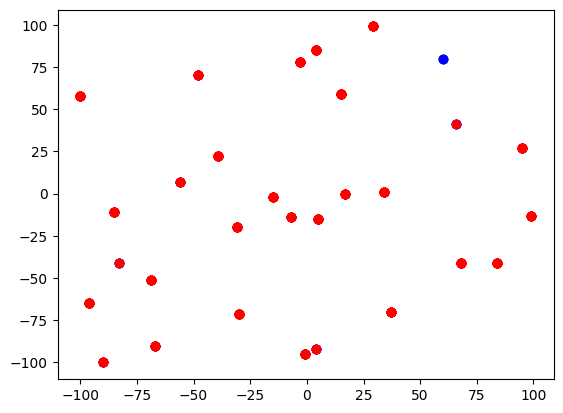

In [8]:
from IPython.display import HTML
from random import randint, seed

seed(50771708)
points= [Point(randint(-100,100), randint(-100,100)) for i in range(30)]
# plt.scatter([0,1,2], [0,1,2]) # -> Points (0,0), (1,1) y (2,2)177

#x = [point.x for point in points]
#y = [point.y for point in points]
#colors= [ randint(0,255) for i in range(len(points))]

#plt.scatter(x,y,c= colors)
#plt.show()

anim = coloringPoints(points)
HTML(anim.to_jshtml())

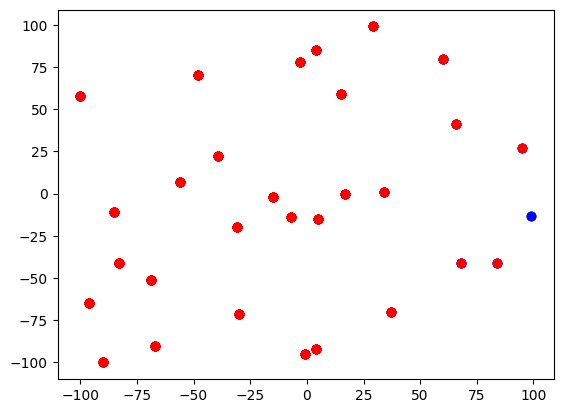

In [9]:
points.sort(key=lambda p: (p.x, p.y))

anim = coloringPoints(points)
HTML(anim.to_jshtml())

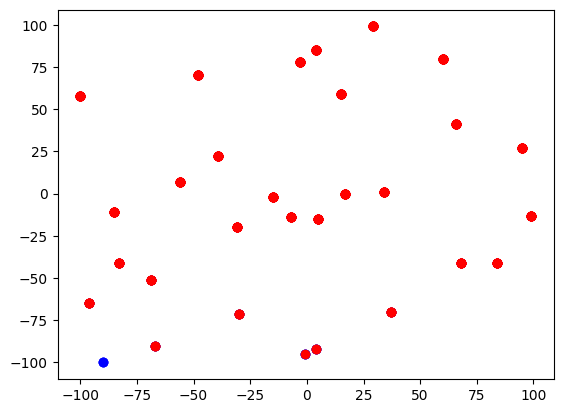

In [10]:
points.sort(key=lambda p: (-p.y, -p.x))

anim = coloringPoints(points)
HTML(anim.to_jshtml())

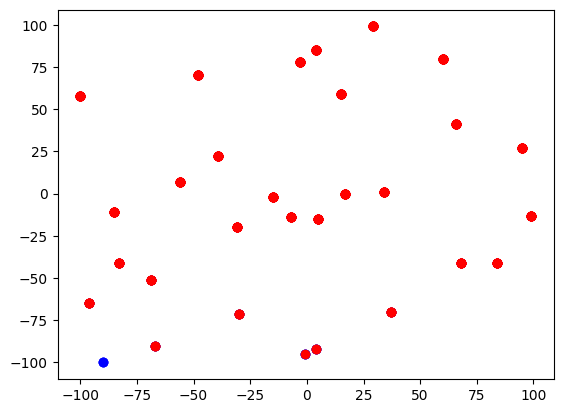

In [ ]:
points.sort(key=lambda p: (-p.y, -p.x))

anim = coloringPoints(points)
HTML(anim.to_jshtml())

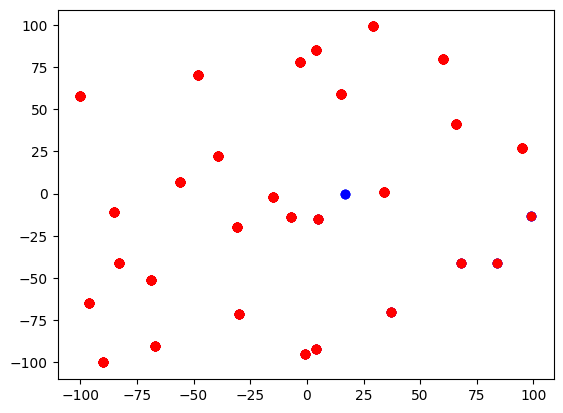

In [11]:
points.sort(key=lambda p: (p.angle))

anim = coloringPoints(points)
HTML(anim.to_jshtml())